- Train-Validation-Test Set Split
- Train models
- parameter search over random space
- Evaluation of fit

# Setup Computational Environment

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
%matplotlib inline

# Look at Chemicals

In [13]:
m = Chem.MolFromSmiles('Cc1ccccc1')

In [14]:
Chem.Kekulize(m)
Chem.MolToSmiles(m,kekuleSmiles=True)

'CC1=CC=CC=C1'

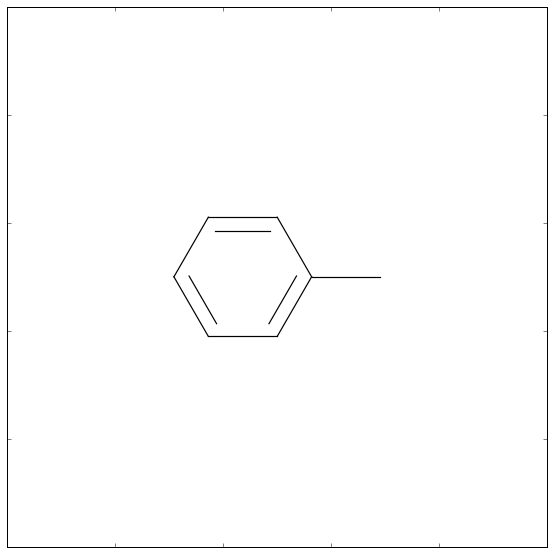

In [16]:
fig = Draw.MolToMPL(m)

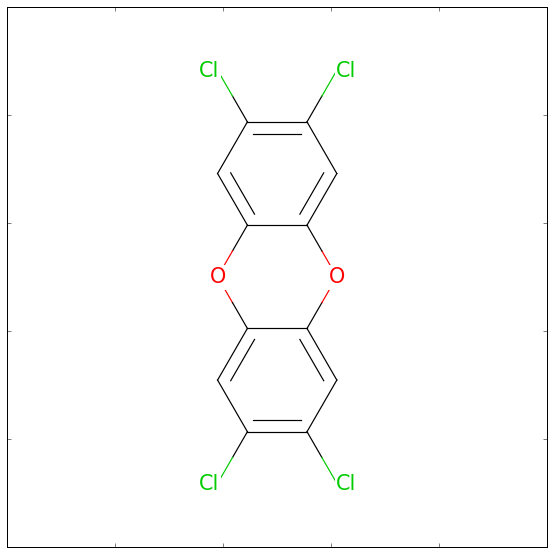

In [17]:
m2 = Chem.MolFromSmiles('C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl')
fig2 = Draw.MolToMPL(m2)

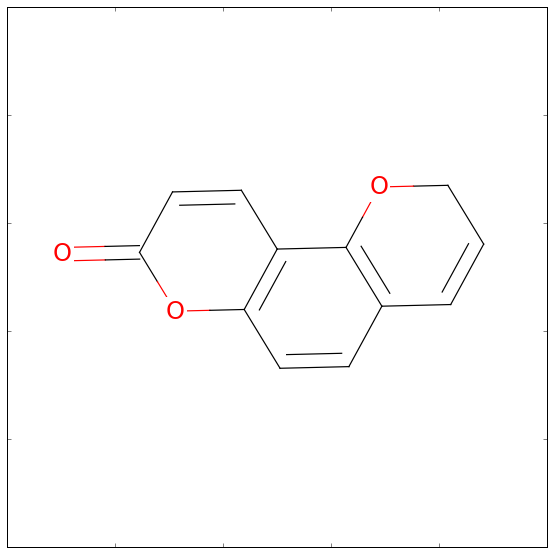

In [24]:
m3 = Chem.MolFromSmiles('O=C1OC2=C(C=C1)C1=C(C=CCO1)C=C2')
fig3 = Draw.MolToMPL(m3)

# Look at a grid of chemicals

In [38]:
smiles = ("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C", "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C(=O)O)cc(OC)c(O)cc1")
mols = [Chem.MolFromSmiles(x) for x in smiles]

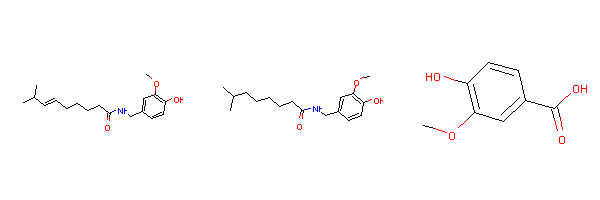

In [39]:
Draw.MolsToGridImage(mols)

In [18]:
suppl = Chem.SDMolSupplier('data/cdk2.sdf')

OSError: File error: Bad input file data/cdk2.sdf

In [ ]:


d_train = pd.read_csv("train-0.1m.csv")
d_test = pd.read_csv("test.csv")
d_train_test = d_train.append(d_test)

vars_categ = ["Month","DayofMonth","DayOfWeek","UniqueCarrier", "Origin", "Dest"]
vars_num = ["DepTime","Distance"]
def get_dummies(d, col):
    dd = pd.get_dummies(d.ix[:, col])
    dd.columns = [col + "_%s" % c for c in dd.columns]
    return(dd)
%time X_train_test_categ = pd.concat([get_dummies(d_train_test, col) for col in vars_categ], axis = 1)
X_train_test = pd.concat([X_train_test_categ, d_train_test.ix[:,vars_num]], axis = 1)
y_train_test = np.where(d_train_test["dep_delayed_15min"]=="Y", 1, 0)

X_train = X_train_test[0:d_train.shape[0]]
y_train = y_train_test[0:d_train.shape[0]]
X_test = X_train_test[d_train.shape[0]:]
y_test = y_train_test[d_train.shape[0]:]

md = LogisticRegression(tol=0.00001, C=1000)
%time md.fit(X_train, y_train)

phat = md.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, phat)